In [1]:
import qiskit
from qiskit.providers.aqt import AQT
from qiskit.visualization import plot_histogram
aqt = AQT.enable_account('2633b2d14dae4d9da7c9df2503857334')

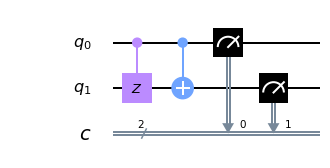

In [18]:
c = qiskit.QuantumCircuit(2, 2)
c.cz(0,1)
c.cx(0, 1)
c.measure([0,1], [0,1])
c.draw(output='mpl')

In [19]:
ideal = aqt.get_backend('aqt_qasm_simulator')
noise = aqt.get_backend('aqt_qasm_simulator_noise_1')

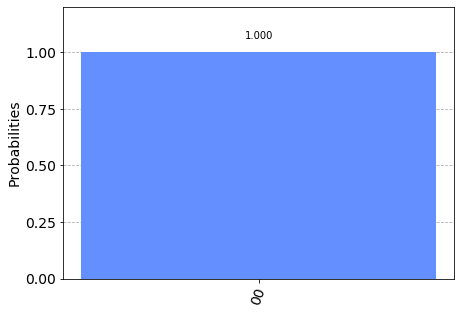

In [20]:
res_ideal = qiskit.execute(c, ideal, shots=200).result()
plot_histogram(res_ideal.get_counts(c))

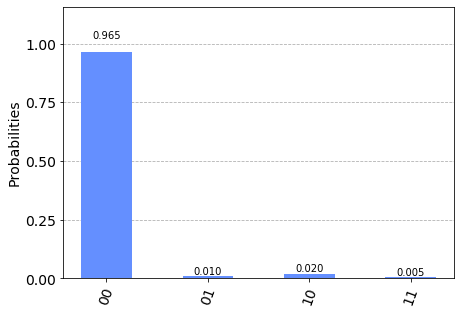

In [21]:
res_noise = qiskit.execute(c, noise, shots=200).result()
plot_histogram(res_noise.get_counts(c))

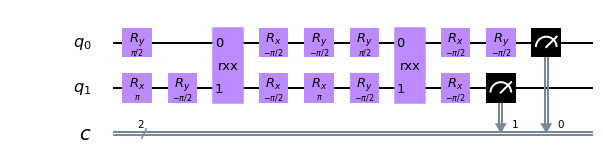

In [22]:
ideal_circ = qiskit.compiler.transpile(c,ideal)
ideal_circ.draw(output='mpl')

In [26]:
from qiskit.providers.ibmq import IBMQ
ibmq = IBMQ.load_account()

Credentials are already in use. The existing account in the session will be replaced.


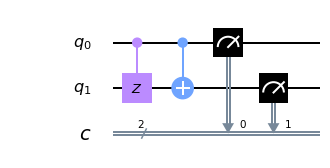

In [28]:
ibmq_sim = ibmq.get_backend('ibmq_qasm_simulator')
ibmq_circ = qiskit.compiler.transpile(c,ibmq_sim)
ibmq_circ.draw(output='mpl')